In [1]:
# Packages used

import numpy as np 
from lmfit import Model
import inspect
import matplotlib.pyplot as plt 


/home/john/anaconda3/envs/codeastro/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


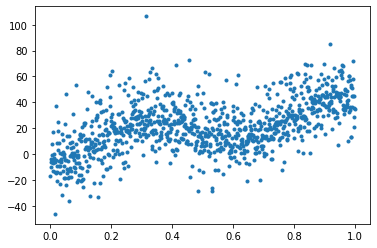

In [2]:
# Data generator

import random

x = np.linspace(0, 1, 1000)

a0 = 4.02
a1 = 31.42
a2 = 11
a3 = 10
a4 = 11


y = [a0 + a1*i + a2 * np.sin(a3*i+a4) for i in x]
y = [i+ np.random.normal(0,10)**1.2 for i in y]

plt.plot(x,y, '.',)

In [3]:
# Function used and initial values for the fit

i_val = [10, 10, 10, 10, 5, 10]    # Initial parameters in order

def generic_fun(x, a0, a1, a2, a3, a4):
    return a0 + a1 * x + a2 * np.sin( a3 * x + a4)


<ipython-input-4-d3d8dcc6f302>:9: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args = inspect.getargspec(generic_fun).args
/home/john/anaconda3/envs/codeastro/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/john/anaconda3/envs/codeastro/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


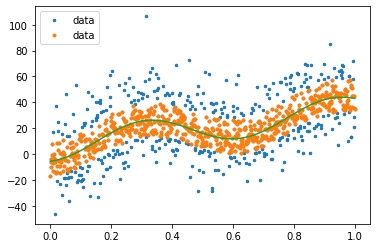

[[Model]]
    Model(generic_fun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 1316
    # variables        = 5
    chi-square         = 36016.7648
    reduced chi-square = 27.4727420
    Akaike info crit   = 4365.15419
    Bayesian info crit = 4391.06595
[[Variables]]
    a0:  5.64585622 +/- 0.52727867 (9.34%) (init = 10)
    a1:  28.5725947 +/- 0.93394228 (3.27%) (init = 10)
    a2:  11.2770467 +/- 0.28637006 (2.54%) (init = 10)
    a3:  10.0828568 +/- 0.13089802 (1.30%) (init = 10)
    a4:  4.73161322 +/- 0.07102241 (1.50%) (init = 5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a3, a4) = -0.920
    C(a0, a1) = -0.916
    C(a1, a3) = -0.627
    C(a0, a4) = -0.602
    C(a1, a4) =  0.595
    C(a0, a3) =  0.595
    C(a1, a2) = -0.219
    C(a0, a2) =  0.164


In [4]:
# This part of the code should be the same for everything

nsig = 2 # Sigma used for the sigma clipping

# Creates model
gmodel = Model(generic_fun)
# Get initial coefficients for the fit
i_params = gmodel.make_params()
args = inspect.getargspec(generic_fun).args
args.remove('x')

iv_dict = {}
for i in range(0,len(args)):
    iv_dict[args[i]] = i_val[i]

for p in i_params:
    i_params[p].value = iv_dict[p]



plt.plot(x, y, '.', label='data', markersize=5)

# Model fit

len_valid = 0    # 0 to force the first iteration
len_y = len(y)
while len_valid < len_y:
    result = gmodel.fit(y, i_params, x=x)
    params = gmodel.make_params()
    for p in params:
        params[p].value = result.params[p].value

    delt = y - gmodel.eval(params, x=x)
    threshold = nsig * np.std(delt) 

    valid = abs(delt) < threshold
    
    len_y = len(y)
    len_valid = len(valid[valid==True])

    # New x and y used
    x = np.array(x)[valid]
    y = np.array(y)[valid]




x_fit = np.linspace(min(x), max(x), num=100)
y_fit = gmodel.eval(params, x=x_fit)





plt.plot(x, y, '.', label='data')
plt.plot(x_fit, y_fit)
plt.legend()
plt.show()

print(result.fit_report())